<a href="https://colab.research.google.com/github/Madelinelai/CNN-RNN/blob/main/1_convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**介紹類神經網路以及專門為影像辨識設計的卷積神經網路**(convolutional neural network)
包含：
1. Feedforward layer
1. Activation (RELU)
1. Convolution layer
1. Pooling layer
1. Batch normalization
1. Dropout



In [ ]:
# 套件安裝 (避免未來 Colab 預設使用新版本 Python 套件造成程式無法執行)
!pip install numpy==1.18.2 matplotlib==3.1.3

     |████████████████████████████████| 20.2MB 1.3MB/s 
     |████████████████████████████████| 13.1MB 12.7MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: matplotlib 3.2.1
    Uninstalling matplotlib-3.2.1:
      Successfully uninstalled matplotlib-3.2.1


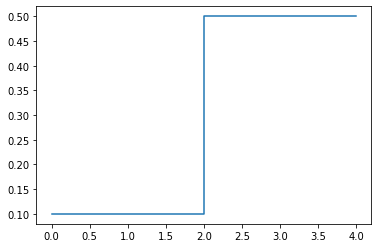

In [ ]:
# 類神經網路：模擬人類神經元運作的網路，隨著時間發展已經跟生物特性越來越遠。

import numpy as np
import matplotlib.pyplot as plt

x = [0, 1, 2, 3, 4] 
y = [0.1, 0.1, 0.1, 0.5, 0.5]

plt.step(x, y)
plt.show()


Feedforward network

藍色圓形：輸入 x

橘色圓形：神經元 x0*w0 + x1*w1 + ...

綠色圓形：輸出 y

黑色線條：權重 w

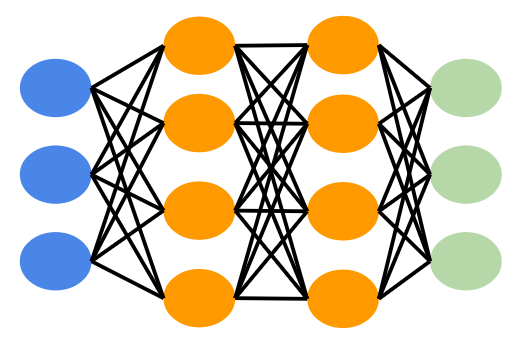

In [ ]:
x = np.array([[-1, 1, 0]])
w1 = np.random.random((3, 4)) - 0.5
w2 = np.random.random((4, 4)) - 0.5
w3 = np.random.random((4, 3)) - 0.5
print(x.shape, w1.shape, w2.shape, w3.shape)
print('w1', w1)
print('w2', w2)
print('w3', w3)

hidden = np.matmul(x, w1)
print('hidden', hidden)
hidden = np.matmul(hidden, w2)
print('hidden', hidden)
y = np.matmul(hidden, w3)
print(y.shape, y)

(1, 3) (3, 4) (4, 4) (4, 3)
w1 [[ 0.26675302 -0.22177065 -0.13467584 -0.07876643]
 [-0.41035212 -0.48687449  0.21352173  0.02811489]
 [-0.03026092 -0.26053722 -0.36029565 -0.21216948]]
w2 [[-0.00665683 -0.02210822  0.3451749   0.22724757]
 [-0.06606239  0.3481963   0.0397967  -0.33044885]
 [ 0.03869186  0.25561744 -0.38192302  0.39893451]
 [-0.01316607  0.2105413   0.1578249   0.46341364]]
w3 [[ 0.44297007  0.17630725 -0.02860404]
 [-0.34829453  0.39683193  0.07120755]
 [ 0.38491287 -0.0318023  -0.18283682]
 [ 0.05943012  0.38771469  0.29094132]]
hidden [[-0.67710514 -0.26510384  0.34819756  0.10688131]]
hidden [[ 0.03408597  0.03416971 -0.36038609  0.12217104]]
(1, 3) [[-0.12825867  0.07839785  0.1028946 ]]


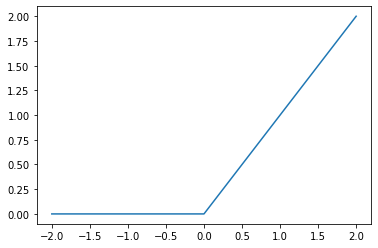

hidden [[0.         0.         0.34819756 0.10688131]]
hidden [[0.01206521 0.1115083  0.         0.18843828]]
(1, 3) [[-0.0222943   0.11943753  0.0624196 ]]


In [ ]:
# Activation 使模型更複雜，成為非線性
# Rectified Linear Unit (RELU) y = max(f(x), 0)
plt.plot([-2, 0, 2], [0, 0, 2])
plt.show()

hidden = np.maximum(np.matmul(x, w1), 0)
print('hidden', hidden)
hidden = np.maximum(np.matmul(hidden, w2), 0)
print('hidden', hidden)
y = np.matmul(hidden, w3)
print(y.shape, y)

In [ ]:
# 通常會加入 bias term
b1 = np.random.random(size=w1.shape[1])
b2 = np.random.random(size=w2.shape[1])
b3 = np.random.random(size=w3.shape[1])
hidden = np.maximum(np.matmul(x, w1) + b1, 0)
print('hidden', hidden)
hidden = np.maximum(np.matmul(hidden, w2) + b2, 0)
print('hidden', hidden)
y = np.matmul(hidden, w3) + b3
print(y.shape, y)

hidden [[0.28246422 0.         1.0857085  1.07056298]]
hidden [[0.98970525 1.31722682 0.37035701 1.29643324]]
(1, 3) [[0.96888532 1.7875009  0.50703912]]


Convolutional Layer

Convolution filter: kxk 大小的 filter 套用在 nxn 大小的影像上，用來「看到」隔壁的資訊。

影像：

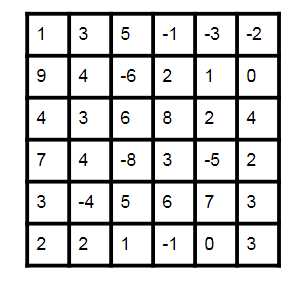

Filter (可以學的 weight):

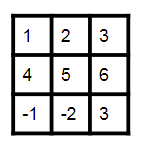

第一次計算 convolution:

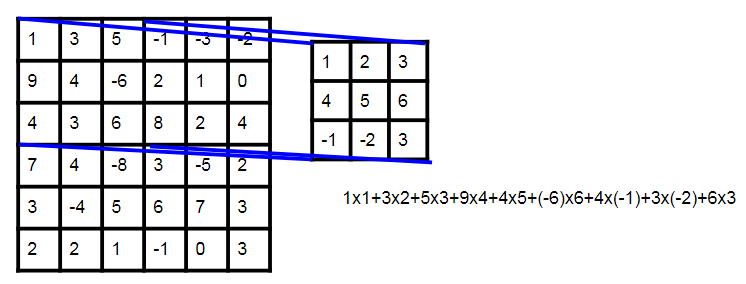

In [ ]:
image = np.array([
    [1, 3, 5, -1, -3, -2],
    [9, 4, -6, 2, 1, 0],
    [4, 3, 6, 8, 2, 4],
    [7, 4, -8, 3, -5, 2],
    [3, -4, 5, 6, 7, 3],
    [2, 2, 1, -1, 0, 3],
])

conv_filter = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [-1, -2, 3]
])

output = np.zeros((4, 4))

for i in range(4):
    for j in range(4):
        for f_i in range(conv_filter.shape[0]):
            for f_j in range(conv_filter.shape[1]):
                output[i][j] += image[i + f_i][j + f_j] * conv_filter[f_i][f_j]

# 6x6 conv 3x3 => 4x4
print(output)

# for 3d image:
# 6x6x3 conv 3x3x3 => 4x4x1

[[ 50.  17. -30.   0.]
 [ 27. 109.  64.  83.]
 [ 48.  45. -15.  12.]
 [ 10.  35.  76.  86.]]


In [ ]:
# padding
pad = 1
image_pad = np.pad(image, [pad, pad], mode='constant')
print('image_pad')
print(image_pad)

# stride
np.random.seed(551335114)
image = np.random.randint(low=0, high=10, size=(7, 7))
print(image)

stride = 2
output = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        for f_i in range(conv_filter.shape[0]):
            for f_j in range(conv_filter.shape[1]):
                output[i][j] += image[i * stride + f_i][j * stride + f_j] * conv_filter[f_i][f_j]
print(output)

# 注意：stride 只能用在大小剛好的 image 上

# output size H', W': 
# H, W: input image size
# HH, WW: filter size
# H' = 1 + (H + 2 * pad - HH) / stride
# W' = 1 + (W + 2 * pad - WW) / stride

# 為什麼處理影像用 convolution layer 會比 feedforward 好？(想想看)

image_pad
[[ 0  0  0  0  0  0  0  0]
 [ 0  1  3  5 -1 -3 -2  0]
 [ 0  9  4 -6  2  1  0  0]
 [ 0  4  3  6  8  2  4  0]
 [ 0  7  4 -8  3 -5  2  0]
 [ 0  3 -4  5  6  7  3  0]
 [ 0  2  2  1 -1  0  3  0]
 [ 0  0  0  0  0  0  0  0]]
[[9 4 0 8 3 4 6]
 [0 6 9 0 0 5 2]
 [3 7 5 6 8 6 7]
 [5 2 4 2 3 2 3]
 [1 0 0 4 1 0 1]
 [7 6 5 8 9 2 3]
 [1 9 7 1 9 5 4]]
[[ 99.  68.  67.]
 [ 85.  80.  83.]
 [ 91. 143.  61.]]


Pooling Layer

filter 內取最大值 (max pooling) 或是取平均值 (average pooling pooling)

通常 stride 會設成跟 filter_size 一樣大小

用來減少參數量，避免 overfitting

In [ ]:
np.random.seed(551335114)
image = np.random.randint(low=0, high=10, size=(6, 6))
print(image)

filter_size = 3
stride = 3
output = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        output[i][j] = -np.inf
        for f_i in range(filter_size):
            for f_j in range(filter_size):
                output[i][j] = max(image[i * stride + f_i][j * stride + f_j], output[i][j])
print(output)


[[9 4 0 8 3 4]
 [6 0 6 9 0 0]
 [5 2 3 7 5 6]
 [8 6 7 5 2 4]
 [2 3 2 3 1 0]
 [0 4 1 0 1 7]]
[[9. 9.]
 [8. 7.]]


Batch Normalization

對每個 batch 的數值做減平均除標準差的 normalize，增加訓練時的穩定性。

平均與標準差在訓練時 running 計算，測試時使用訓練時候算好的平均跟標準差(training / testing 行為不同 !!)。

演算法：

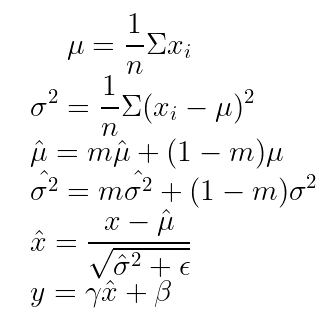

In [ ]:
# sample_mean = x.mean(axis=0)  # axis=0 因為 n 筆 instance 會有 n 個 mean
# sample_var = np.power(x.std(axis=0), 2)
# running_mean = momentum * running_mean + (1 - momentum) * sample_mean
# running_var = momentum * running_var + (1 - momentum) * sample_var
# x_hat = (x - sample_mean) / np.sqrt(sample_var + eps)
# y = gamma * x_hat + beta

Dropout

訓練時隨機丟掉某些 weight (設為0)，預測時用所有的 weight。因為訓練時有些 weight 設成 0 ，所以預測時要依據丟掉的比例還原回來。

原本網路：

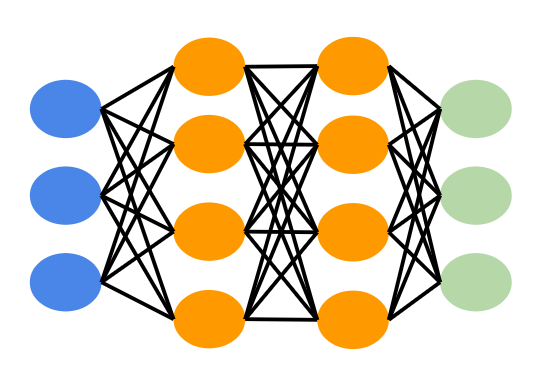

應用 dropout 時的訓練方式(每丟掉的 link 都重新隨機選)：

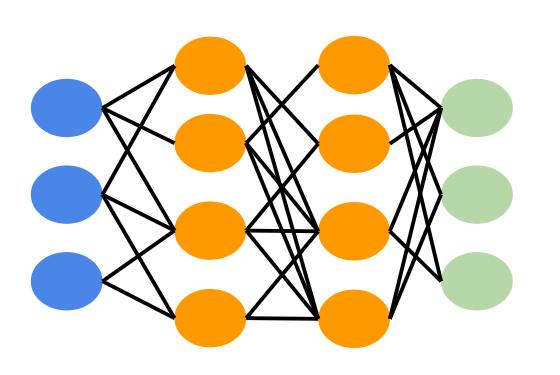

In [ ]:
# 以三層的類神經網路作為範例
p = 0.8 # 保留的機率，越大表示 dropout 越小

def train(x):
    hidden1 = np.maximum(0, np.matmul(w1, x) + b1)
    mask1 = np.random.rand((hidden1.shape[0], hidden1.shape[1])) < p # 小於 p 的會是 true (會保留)
    hidden1 *= mask1
    hidden2 = np.maximum(0, np.matmul(w2, hidden1) + b2)
    mask2 = np.random.rand((hidden2.shape[0], hidden2.shape[1])) < p
    hidden2 *= mask2
    output = np.matmul(w3, hidden2) + b3
  
def predict(x):
    hidden1 = np.maximum(0, np.matmul(w1, x) + b1) * p
    hidden2 = np.maximum(0, np.matmul(w2, hidden1) + b2) * p
    output = np.matmul(w3, hidden2) + b3

# 實做上不希望 predict 的時候有過多的運算，所以 p 的校正會在 train 的時候做
# mask1 = (np.random.rand((hidden1.shape[0], hidden1.shape[1])) < p) / p
# 則 predict 時不用多一個 "* p"

通常一個影像分類的 Convolutional Neural Network (CNN) 會長這樣：

圖片輸入 => conv => bn => relu => pooling => conv => bn => relu => pooling ... => feedforward

最後一層使用 feedforward ，輸出維度為影像的種類數。

會在「預訓練模型」單元介紹如何實作訓練類神經網路。